In [1]:
# Initialization of camera feed, esc to capture frame
import cv2

cv2.namedWindow("tripod cam")
vc = cv2.VideoCapture(1)

if vc.isOpened(): # try to get the first frame
    rval, frame = vc.read()
else:
    rval = False

while rval:
    cv2.imshow("tripod cam", frame)
    rval, frame = vc.read()
    key = cv2.waitKey(20)
    if key == 27: # exit on ESC
        break

cv2.imwrite('Images/barcode.png', frame)
vc.release()
cv2.destroyWindow("tripod cam")

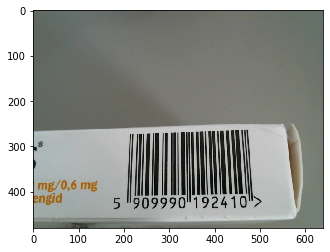

In [1]:
import cv2
import matplotlib.pyplot as plt

image_BGR = cv2.imread(r"G:\\My Drive\\1. EIT Digital master\\Estland\\Semester 1\\Machine vision\\MV2021\Lab examples\\Images\\barcode.png")
image_RGB = cv2.cvtColor(image_BGR, cv2.COLOR_BGR2RGB)
plt.imshow(image_RGB, interpolation='none') # Plot the image, turn off interpolation
plt.show() # Show the image window

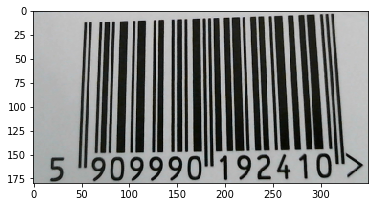

In [2]:
y_pixel = 260
x_pixel = 160

image_RGB_crop = image_RGB[y_pixel:y_pixel+(440-y_pixel), x_pixel:x_pixel+(510-x_pixel)]
plt.imshow(image_RGB_crop, interpolation='none') # Plot the image, turn off interpolation
plt.show() # Show the image window

In [5]:
template = image_RGB_crop

#https://www.pyimagesearch.com/2021/03/22/opencv-template-matching-cv2-matchtemplate/
result = cv2.matchTemplate(image_RGB, template, cv2.TM_CCOEFF_NORMED)
(minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(result)
(startX, startY) = maxLoc
endX = startX + template.shape[1]
endY = startY + template.shape[0]
cv2.rectangle(image_BGR, (startX, startY), (endX, endY), (0, 255, 0), 3)
# show the output image
cv2.imshow("Output", image_BGR)
cv2.waitKey(0)

-1

In [8]:
# Live detection
template = image_RGB_crop
cv2.namedWindow("tripod cam")
vc = cv2.VideoCapture(1)

if vc.isOpened(): # try to get the first frame
    rval, img = vc.read()
else:
    rval = False

cv2.destroyWindow("tripod cam")

while True:
    rval, img = vc.read()
    key = cv2.waitKey(20)

    result = cv2.matchTemplate(img, template, cv2.TM_CCOEFF_NORMED)
    (minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(result)
    (startX, startY) = maxLoc
    endX = startX + template.shape[1]
    endY = startY + template.shape[0]

    probThreshold = 0.25
    if maxVal > probThreshold:
        cv2.rectangle(img, (startX, startY), (endX, endY), (0, 255, 0), 3)
    # show the output image
    cv2.putText(img,"Prob.: %0.2f" %maxVal, (250,50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 2, (0, 255, 0))
    cv2.imshow("Output", img)
    cv2.waitKey(20)
    

    if key == 27: # exit on ESC
        break

vc.release()
cv2.destroyWindow("Output")

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-sn_xpupm\opencv\modules\highgui\src\window_w32.cpp:1246: error: (-27:Null pointer) NULL window: 'tripod cam' in function 'cvDestroyWindow'
